In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [59]:
#Problem Statement : We will use acoustic features to distinguish a male voice from female. Load the dataset from “voice.csv”,identify the target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% of the data kept aside for testing.

In [94]:
data = pd.read_csv("C:/Users/Agriya/Desktop/Data Science/Learning/Datasets/voice.csv")

In [95]:
data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [96]:
data.shape

(3168, 21)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [98]:
data["label"].value_counts()

female    1584
male      1584
Name: label, dtype: int64

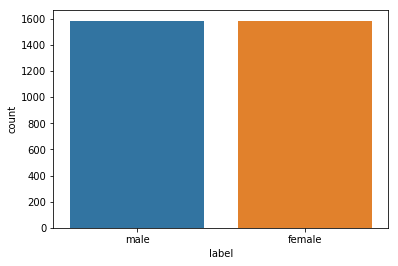

In [99]:
sns.countplot(x = "label", data = data)

In [100]:
input = LabelEncoder()

In [101]:
data["label"] = input.fit_transform(data["label"])

In [102]:
data["label"].unique()

array([1, 0], dtype=int64)

In [68]:
# from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder = OneHotEncoder(categorical_features = [data["label"]])
# X = OneHotEncoder.fit_transform(X).toarray()

In [103]:
data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000      1  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632      1  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512      1  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119      1  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274      1  

[5 rows x 21 columns]

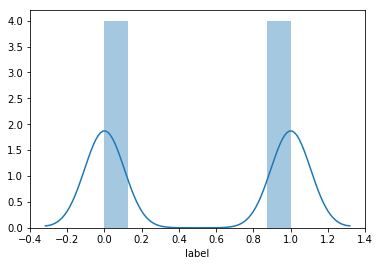

In [104]:
sns.distplot(data["label"])

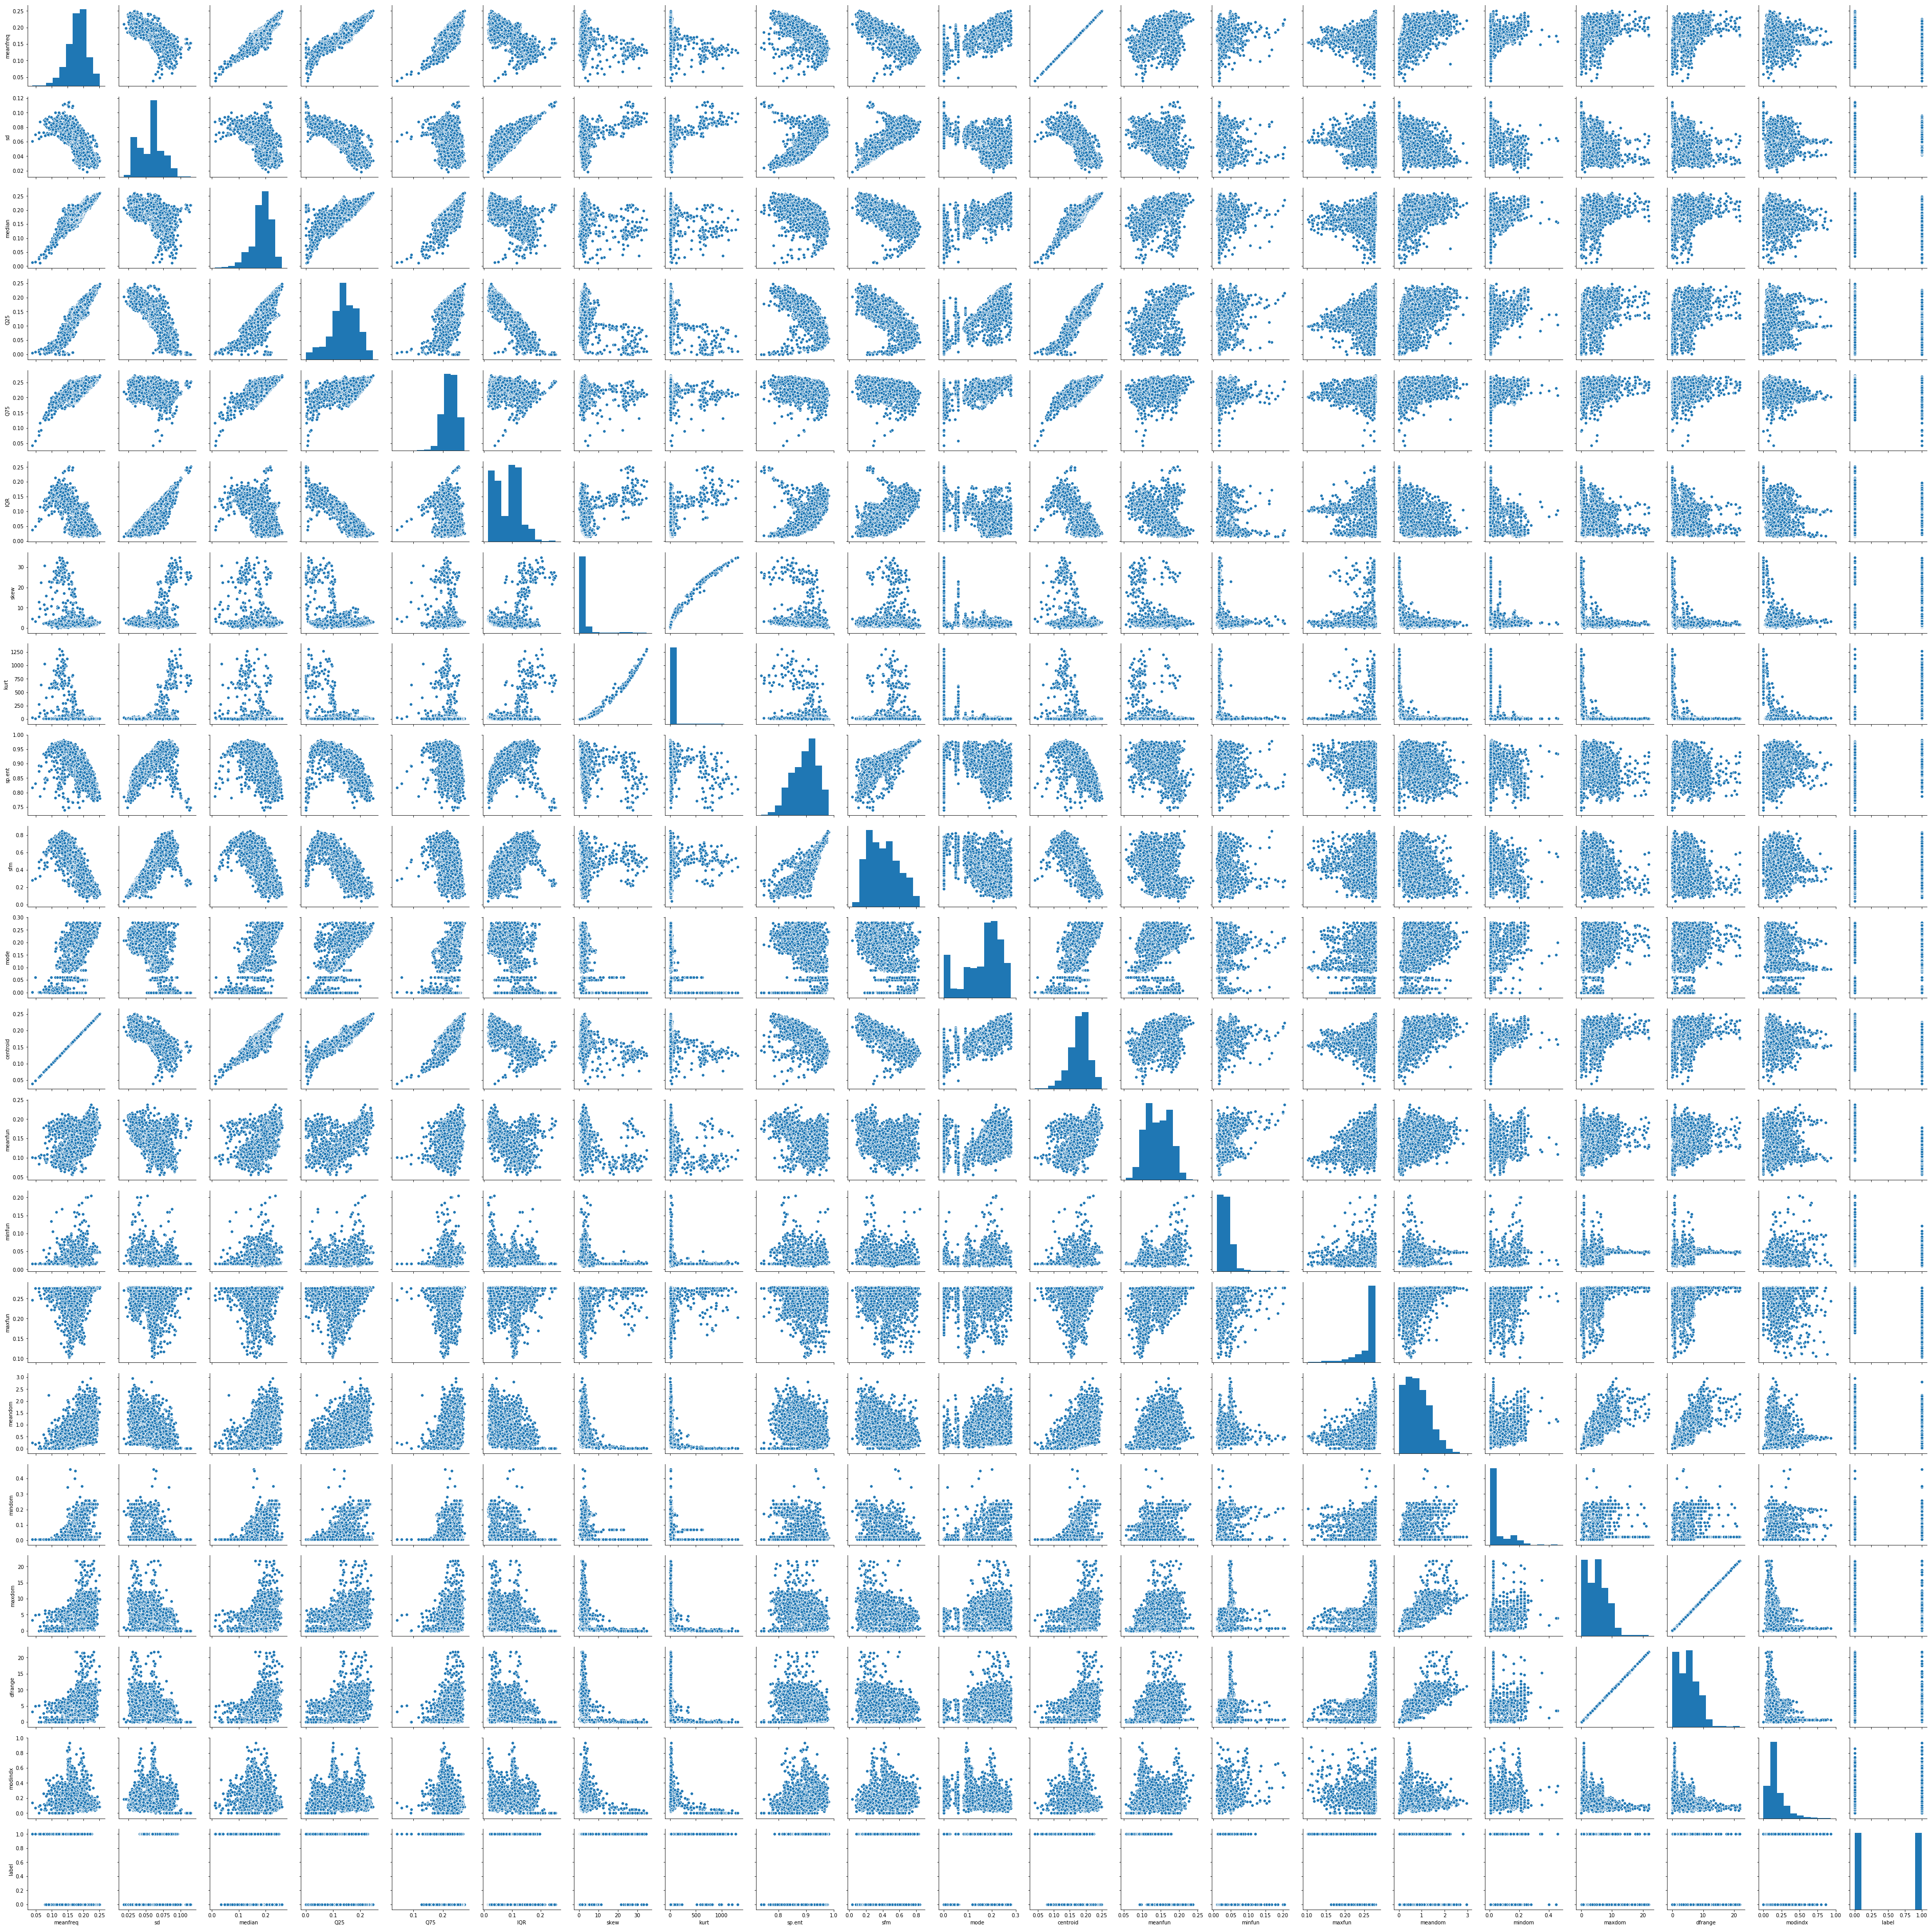

In [71]:
sns.pairplot(data)

In [105]:
label_mapping = {index: label for index, label in enumerate(input.classes_)}
label_mapping

{0: 'female', 1: 'male'}

In [110]:
x = data.iloc[:,:20]
x.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274

In [111]:
y = data[["label"]]
y.head()

label
0      1
1      1
2      1
3      1
4      1

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 5)
x_train.shape

(2534, 20)

In [113]:
x_test.shape

(634, 20)

In [114]:
y_train.shape

(2534, 1)

In [115]:
y_test.shape

(634, 1)

In [79]:
#Problem statement: Fit a logistic regression model and measure the accuracy on the test set.

In [116]:
model = LogisticRegression()

In [117]:
model.fit(x_train,y_train)

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
predicted_y = model.predict(x_test)

In [119]:
from sklearn.metrics import accuracy_score

accuracy_score(predicted_y,y_test)

0.9006309148264984

In [84]:
#Problem Statement: Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated. aPlot the correlation matrix using seaborn heatmap.

In [120]:
Correlation = data.corr()
Correlation

meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
sd       -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660   
median    0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352   
Q25       0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189   
Q75       0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636   
IQR      -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000   
skew     -0.322327  0.314597 -0.257407 -0.319475 -0.206339  0.249497   
kurt     -0.316036  0.346241 -0.243382 -0.350182 -0.148881  0.316185   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813   
sfm      -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601   
mode      0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764   
centroid  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
meanfun   0.460844 -0.466281  0.414909  0.545035  0.155091 -0.534462   
minfun    0.383937 -0.345609  0.337602  0.320994  0.258002 -0.222680   
maxfun    0.274004 -0.129662  0.251328  0.199841  0.285584 -0.069588   
meandom   0.536666 -0.482726  0.455943  0.467403  0.359181 -0.333362   
mindom    0.229261 -0.357667  0.191169  0.302255 -0.023750 -0.357037   
maxdom    0.519528 -0.482278  0.438919  0.459683  0.335114 -0.337877   
dfrange   0.515570 -0.475999  0.435621  0.454394  0.335648 -0.331563   
modindx  -0.216979  0.122660 -0.213298 -0.141377 -0.216475  0.041252   
label    -0.337415  0.479539 -0.283919 -0.511455  0.066906  0.618916   

              skew      kurt    sp.ent       sfm  ...  centroid   meanfun  \
meanfreq -0.322327 -0.316036 -0.601203 -0.784332  ...  1.000000  0.460844   
sd        0.314597  0.346241  0.716620  0.838086  ... -0.739039 -0.466281   
median   -0.257407 -0.243382 -0.502005 -0.661690  ...  0.925445  0.414909   
Q25      -0.319475 -0.350182 -0.648126 -0.766875  ...  0.911416  0.545035   
Q75      -0.206339 -0.148881 -0.174905 -0.378198  ...  0.740997  0.155091   
IQR       0.249497  0.316185  0.640813  0.663601  ... -0.627605 -0.534462   
skew      1.000000  0.977020 -0.195459  0.079694  ... -0.322327 -0.167668   
kurt      0.977020  1.000000 -0.127644  0.109884  ... -0.316036 -0.194560   
sp.ent   -0.195459 -0.127644  1.000000  0.866411  ... -0.601203 -0.513194   
sfm       0.079694  0.109884  0.866411  1.000000  ... -0.784332 -0.421066   
mode     -0.434859 -0.406722 -0.325298 -0.485913  ...  0.687715  0.324771   
centroid -0.322327 -0.316036 -0.601203 -0.784332  ...  1.000000  0.460844   
meanfun  -0.167668 -0.194560 -0.513194 -0.421066  ...  0.460844  1.000000   
minfun   -0.216954 -0.203201 -0.305826 -0.362100  ...  0.383937  0.339387   
maxfun   -0.080861 -0.045667 -0.120738 -0.192369  ...  0.274004  0.311950   
meandom  -0.336848 -0.303234 -0.293562 -0.428442  ...  0.536666  0.270840   
mindom   -0.061608 -0.103313 -0.294869 -0.289593  ...  0.229261  0.162163   
maxdom   -0.305651 -0.274500 -0.324253 -0.436649  ...  0.519528  0.277982   
dfrange  -0.304640 -0.272729 -0.319054 -0.431580  ...  0.515570  0.275154   
modindx  -0.169325 -0.205539  0.198074  0.211477  ... -0.216979 -0.054858   
label     0.036627  0.087195  0.490552  0.357499  ... -0.337415 -0.833921   

            minfun    maxfun   meandom    mindom    maxdom   dfrange  \
meanfreq  0.383937  0.274004  0.536666  0.229261  0.519528  0.515570   
sd       -0.345609 -0.129662 -0.482726 -0.357667 -0.482278 -0.475999   
median    0.337602  0.251328  0.455943  0.191169  0.438919  0.435621   
Q25       0.320994  0.199841  0.467403  0.302255  0.459683  0.454394   
Q75       0.258002  0.285584  0.359181 -0.023750  0.335114  0.335648   
IQR      -0.222680 -0.069588 -0.333362 -0.357037 -0.337877 -0.331563   
skew     -0.216954 -0.080861 -0.336848 -0.061608 -0.305651 -0.304640   
kurt     -0.203201 -0.045667 -0.303234 -0.103313 -0.274500 -0.272729   
sp.ent   -0.305826 -0.120738 -0.293562 -0.294869 -0.324253 -0.319054   
sfm      -

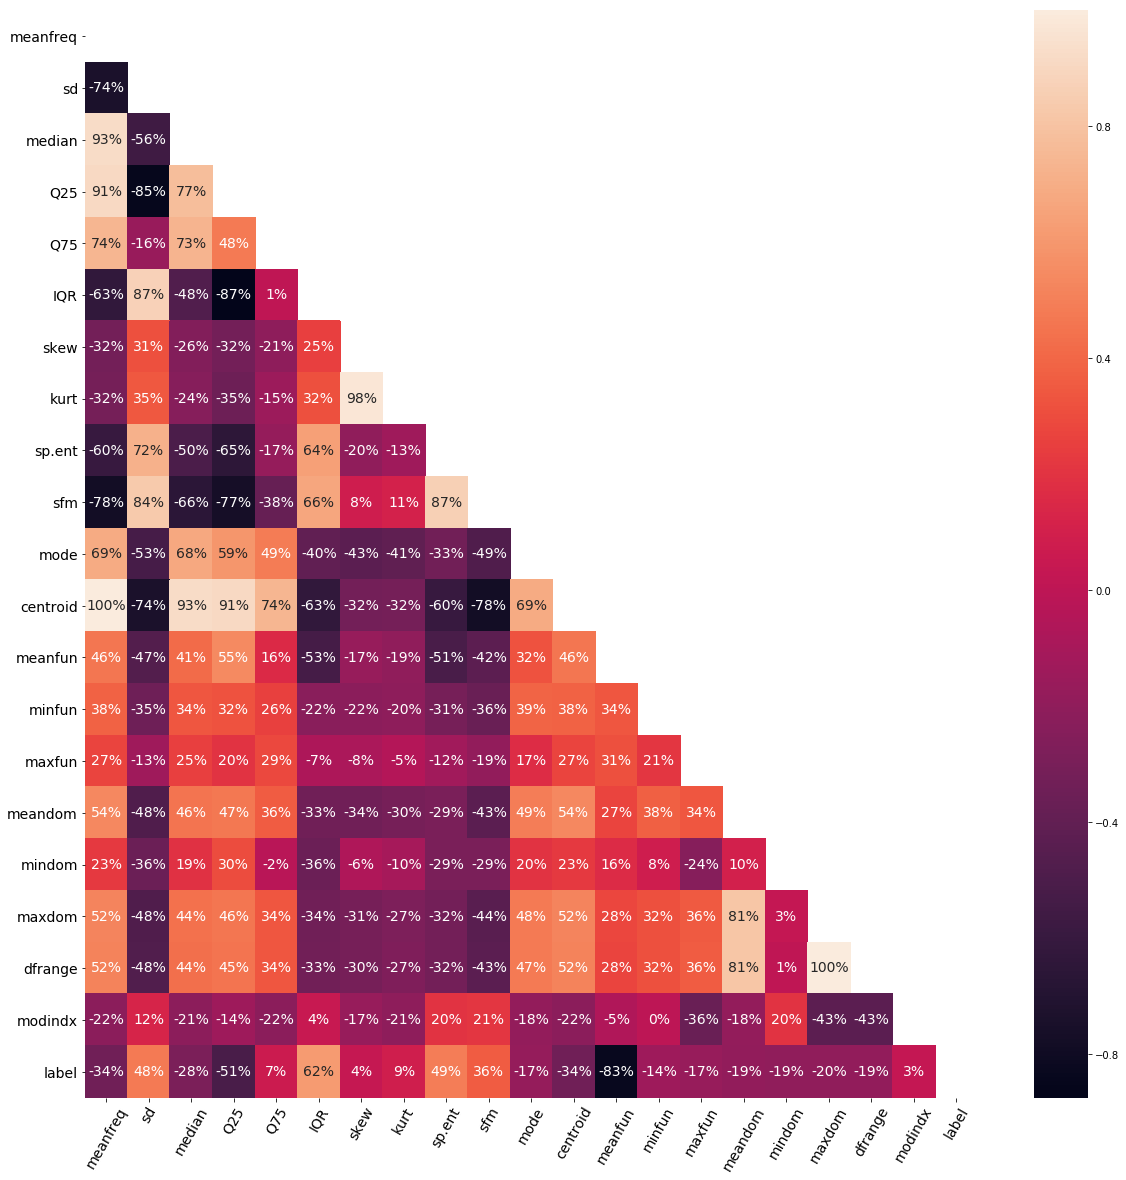

In [121]:
mask = np.zeros_like(Correlation)
mask_check = np.triu_indices_from(mask)
mask[mask_check] = True

plt.figure(figsize=(20,20))
sns.heatmap(Correlation, annot = True, mask = mask, fmt = ".0%", annot_kws = {"size": 14})
plt.xticks(rotation = 60, fontsize = 14)
plt.yticks(rotation = 0, fontsize = 14)
plt.show()

In [122]:
data.corr()["label"].sort_values()

meanfun    -0.833921
Q25        -0.511455
meanfreq   -0.337415
centroid   -0.337415
median     -0.283919
maxdom     -0.195657
mindom     -0.194974
dfrange    -0.192213
meandom    -0.191067
mode       -0.171775
maxfun     -0.166461
minfun     -0.136692
modindx     0.030801
skew        0.036627
Q75         0.066906
kurt        0.087195
sfm         0.357499
sd          0.479539
sp.ent      0.490552
IQR         0.618916
label       1.000000
Name: label, dtype: float64

In [132]:
import statsmodels.api as sm

logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.088327
         Iterations 10
                                 Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.873   
Dependent Variable:        label                 AIC:                   593.6394
Date:                      2020-02-17 22:14      BIC:                   696.6740
No. Observations:          3168                  Log-Likelihood:        -279.82 
Df Model:                  16                    LL-Null:               -2195.9 
Df Residuals:              3151                  LLR p-value:           0.0000  
Converged:                 1.0000                Scale:                 1.0000  
No. Iterations:            10.0000                                              
--------------------------------------------------------------------------------
           Coef.      Std.Err.       z     P>|z|       [0.025         0.975]    
---------------------------------------

In [129]:
result.params  ### This give cofficent

meanfreq    -33.893008
sd            5.456713
median       -3.135880
Q25         -17.238706
Q75          26.257185
IQR          35.818735
skew         -0.002755
kurt         -0.004771
sp.ent       25.399513
sfm          -9.032219
mode          2.651174
centroid     21.506975
meanfun    -168.580823
minfun       35.269399
maxfun       -2.822040
meandom       0.106072
mindom       -0.411546
maxdom       -0.212462
dfrange       0.199048
modindx      -3.558192
dtype: float64

In [128]:
round(result.pvalues,3)

meanfreq    1.000
sd          0.866
median      0.803
Q25           NaN
Q75           NaN
IQR           NaN
skew        0.986
kurt        0.285
sp.ent      0.000
sfm         0.000
mode        0.224
centroid    1.000
meanfun     0.000
minfun      0.000
maxfun      0.671
meandom     0.804
mindom      0.886
maxdom      0.507
dfrange       NaN
modindx     0.028
dtype: float64

In [31]:
#Problem Statement: Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model.

In [147]:
#X = data[["sp.ent","sfm","meanfun","minfun","modindx"]]
X = data[["meanfun","meanfreq","centroid","sd","sfm","sp.ent","median","Q25","IQR"]]
y = data[["label"]]

In [148]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(x,y, test_size = 0.20, random_state = 5)

In [149]:
Logistic = LogisticRegression()

In [150]:
Logistic.fit(X_Train,Y_Train)

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [151]:
Y_Predict = Logistic.predict(X_Test)

In [152]:
accuracy_score(Y_Predict,Y_Test)

0.9006309148264984

In [154]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(Y_Test,Y_Predict)
confusion_matrix

array([[258,  56],
       [  7, 313]], dtype=int64)

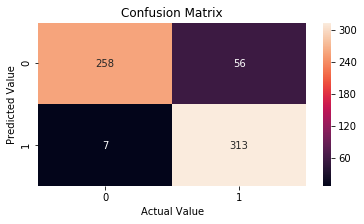

In [155]:
plt.figure(figsize = (6,3))
sns.heatmap(confusion_matrix,annot = True, fmt = "g")
plt.title("Confusion Matrix")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [156]:
print(classification_report(Y_Test,Y_Predict))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       314
           1       0.85      0.98      0.91       320

   micro avg       0.90      0.90      0.90       634
   macro avg       0.91      0.90      0.90       634
weighted avg       0.91      0.90      0.90       634



## Predicting probabilities for the text data

In [142]:
probs = model.predict_proba(X_Test)

## Keeping probabilities of postive class only

In [143]:
probs = probs[:,1]

## Computing AUC Scode

In [144]:
auc = roc_auc_score(Y_Test, probs)
print('AUC: %.2f' % auc)

AUC: 0.93


## Getting ROC curve

In [145]:
fpr,tpr,thresolds = roc_curve(Y_Test, probs)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
thresolds

## Plotting ROC Curve

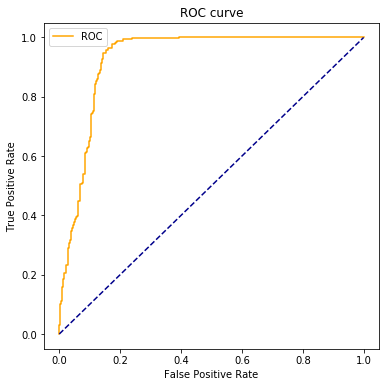

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (6,6))
plt.plot(fpr,tpr,color = "orange",label = "ROC")
plt.plot([0,1],[0,1], color = "darkblue", linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

## End in the above step

## Print the predicted probabilities of class 1

In [48]:
y_pred_prob = model.predict_proba(X_Test)
y_pred_prob = y_pred_prob[:,1]
y_pred_prob = y_pred_prob.reshape(1,-1)

## Setting up the threshold at 0.35

In [49]:
from sklearn.preprocessing import binarize

y_pred_class = binarize(y_pred_prob,0.35)[0]
y_pred_class = y_pred_class.astype(int)

In [50]:
confusion_matrix(Y_Test,y_pred_class)

array([[232,  82],
       [  1, 319]], dtype=int64)

In [51]:
print(classification_report(Y_Test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85       314
           1       0.80      1.00      0.88       320

   micro avg       0.87      0.87      0.87       634
   macro avg       0.90      0.87      0.87       634
weighted avg       0.89      0.87      0.87       634



In [52]:
auc_score2 = roc_auc_score(Y_Test, y_pred_class)
print(auc_score2)

0.8678642515923567
